In [1]:
from __future__ import print_function
from ipywidgets import interactive
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def area_of_pixel(pixel_size, center_lat):
    """Calculate m^2 area of a wgs84 square pixel.

    Adapted from: https://gis.stackexchange.com/a/127327/2397

    Parameters:
        pixel_size (float): length of side of pixel in degrees.
        center_lat (float): latitude of the center of the pixel. Note this
            value +/- half the `pixel-size` must not exceed 90/-90 degrees
            latitude or an invalid area will be calculated.

    Returns:
        Area of square pixel of side length `pixel_size` centered at
        `center_lat` in km^2.
        
    posted in https://gis.stackexchange.com/questions/127165/
    
    """
    a = 6378137  # meters
    b = 6356752.3142  # meters
    e = math.sqrt(1 - (b/a)**2)
    area_list = []
    for f in [center_lat+pixel_size/2, center_lat-pixel_size/2]:
        zm = 1 - e*np.sin(np.radians(f))
        zp = 1 + e*np.sin(np.radians(f))
        area_list.append(
            math.pi * b**2 * (
                np.log(zp/zm) / (2*e) +
                np.sin(np.radians(f)) / (zp*zm)))
    return (pixel_size / 360. * (area_list[0] - area_list[1]))/(10**6)


area_of_pixel(1/120, 0)

0.8547966714295331

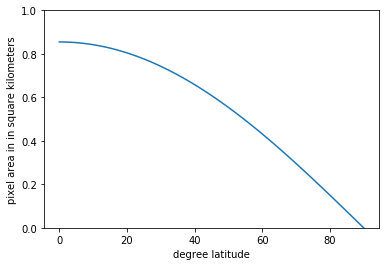

In [2]:
def pixplot(size):
    plt.figure(2)
    lat = np.linspace(0,90, num = 100)
    
    plt.plot(lat, area_of_pixel(size, lat))
    plt.ylim(0, 1)
    plt.xlabel('degree latitude')
    plt.ylabel('pixel area in in square kilometers')
    plt.show()

     
pixplot(1/120)

In [3]:
interactive_plot = interactive(pixplot, size=(1/120, 1/12, 1/120))
interactive_plot

interactive(children=(FloatSlider(value=0.041666666666666664, description='size', max=0.08333333333333333, min…